In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/train_1'
classes = os.listdir(path)
classes


['dogs', 'cats']

#Visualisation

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/train_1/cats')
dog_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/train_1/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

#Creating Data Sets

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Animal Detection Datasets/train_1'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 8005 files belonging to 2 classes.
Using 7205 files for training.
Found 8005 files belonging to 2 classes.
Using 800 files for validation.


#CNN Model

In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


#Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

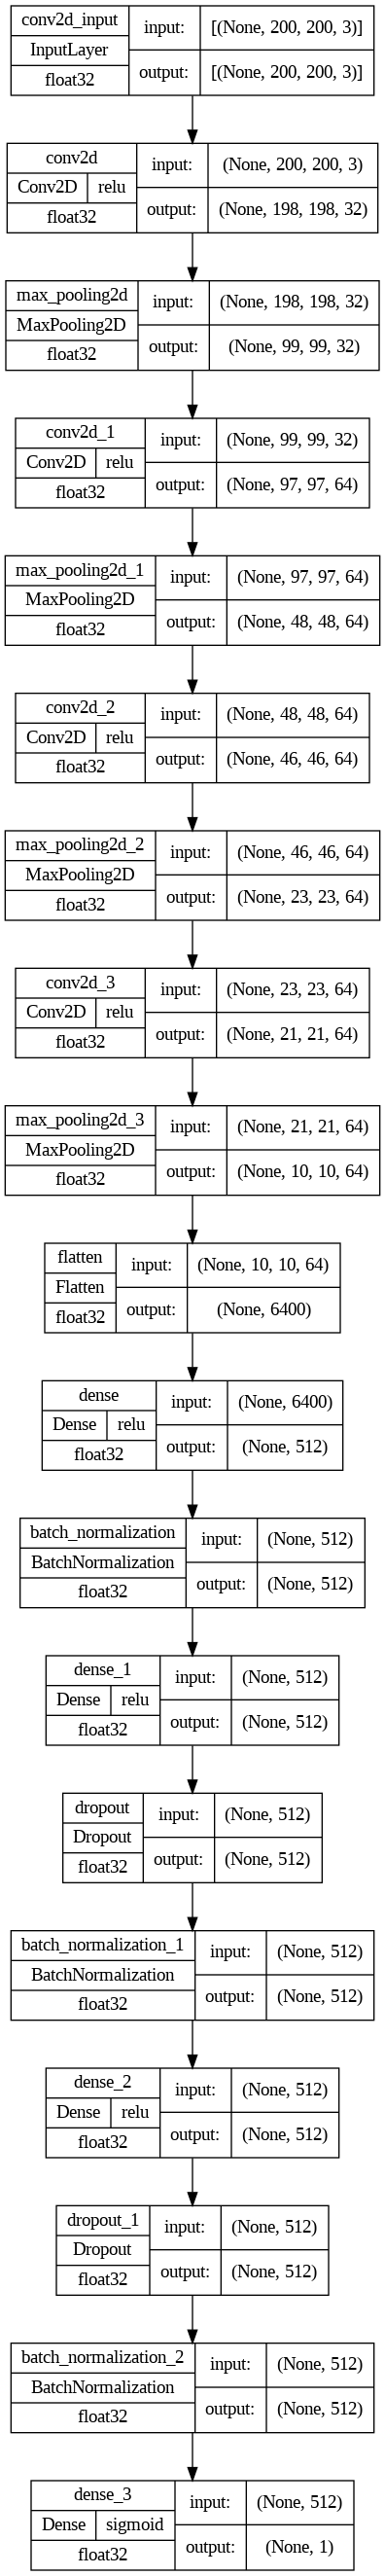

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [ ]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
226/226 [==============================] - 653s 3s/step - loss: 0.3993 - accuracy: 0.8239 - val_loss: 1.8923 - val_accuracy: 0.5525
Epoch 2/10
226/226 [==============================] - 663s 3s/step - loss: 0.3045 - accuracy: 0.8736 - val_loss: 0.9160 - val_accuracy: 0.6700
Epoch 3/10
226/226 [==============================] - 656s 3s/step - loss: 0.2773 - accuracy: 0.8797 - val_loss: 0.7783 - val_accuracy: 0.7350
Epoch 4/10
226/226 [==============================] - 649s 3s/step - loss: 0.2329 - accuracy: 0.9051 - val_loss: 0.9061 - val_accuracy: 0.6900
Epoch 5/10
226/226 [==============================] - 664s 3s/step - loss: 0.2278 - accuracy: 0.9090 - val_loss: 0.7794 - val_accuracy: 0.6200
Epoch 6/10
226/226 [==============================] - 638s 3s/step - loss: 0.3158 - accuracy: 0.8633 - val_loss: 1.0291 - val_accuracy: 0.7225
Epoch 7/10
226/226 [==============================] - 639s 3s/step - loss: 0.3665 - accuracy: 0.8253 - val_loss: 1.7594 - val_accuracy: 0.4950

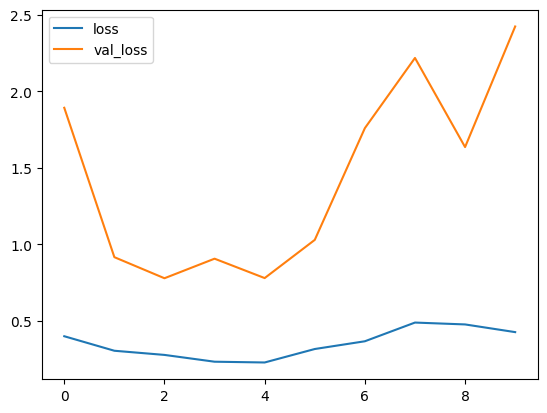

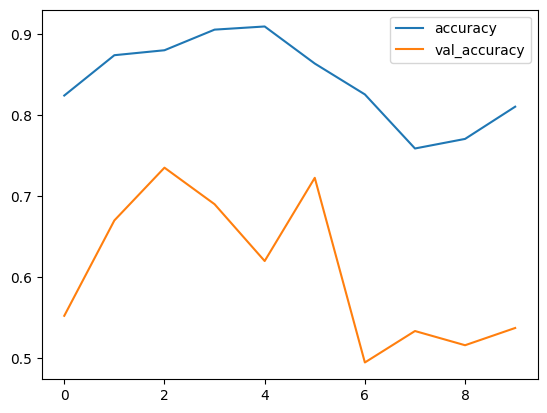

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

#Testing the model

1/1 [==============================] - 0s 107ms/step
Cat


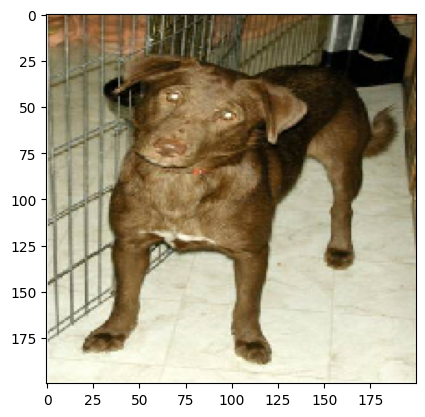

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/dog.1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")


1/1 [==============================] - 0s 169ms/step
Cat


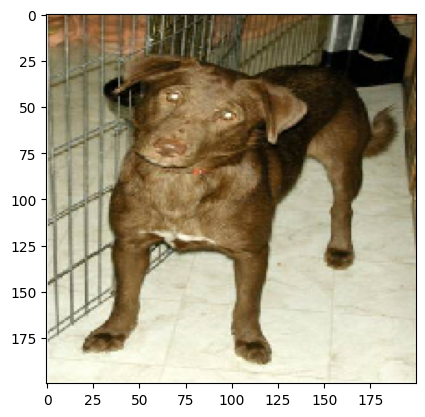

In [ ]:
test_image = image.load_img('/content/dog.1.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
